In [4]:
import tweepy
import pandas as pd

In [5]:
consumer_key = "Ps53xq4Q3QhZw9z73YTa5CMd6"
consumer_secret = "d0iw3DGui0zziqtr2khsoMPFWz8bZYnEkk5KUyXlCSOtWwAdox"
access_token = "1405823723827986435-aCRNcZUEupzFHYhYyC3tMsqclT28i1"
access_token_secret = "Tmuyx9neADg8ttjyqPrxp5TjqNhV9xFdXo6dLyDEuBURm"

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
posts = api.user_timeline(screen_name = "BillGates", count=100, tweet_mode = "extended")

In [8]:
print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
    print(str(i) + ') '+tweet.full_text + '\n')
    i = i+1

Show the 5 recent tweets: 

1) The climate crisis is already devastating communities. More funding is necessary to ensure agricultural and technological innovations are widely available to the most vulnerable, helping them adapt to climate change, save lives, and increase economic opportunity. https://t.co/KvQAM73myZ

2) I have never met anyone who was more passionate about reducing the world’s worst inequities in health than Paul Farmer. I continue to learn from my dear friend’s life and legacy today. https://t.co/Mk3HFoiqEn

3) More than 1B people globally still suffer from #NTDs, many caused by parasites. I got a firsthand look at these creepy crawlies at the Parasitic Museum in Tokyo. The more we understand them, the better we can address the diseases they cause. https://t.co/jDjFYCFVgv

4) This year's #BESummit2022 brought together investors, policymakers, and innovators to tackle one of the world’s toughest problems: climate change. https://t.co/nZ4SWXKrhk

5) Math shouldn’t be a

In [9]:
#Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

#show the first 5 rows of data
df.head()

,Tweets
0,The climate crisis is already devastating comm...
1,I have never met anyone who was more passionat...
2,More than 1B people globally still suffer from...
3,This year's #BESummit2022 brought together inv...
4,"Math shouldn’t be a gatekeeper, limiting a stu..."


In [23]:
#clean the text from hastag, link, mention
import re

#create a function to clean the tweets #r means raw string
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #removed @mentions
    text = re.sub(r'#', '',text) #removing the hastag symbo
    text = re.sub(r'RT[\s]+', '', text) #removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) #removing the hyperlink
    
    return text

#Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

#Show the cleaned text
df

,Tweets,Subjectivity,Polarity
0,The climate crisis is already devastating comm...,0.585714,0.014286
1,I have never met anyone who was more passionat...,0.783333,-0.183333
2,More than 1B people globally still suffer from...,0.500000,0.250000
3,This year's BESummit2022 brought together inve...,0.000000,0.000000
4,"Math shouldn’t be a gatekeeper, limiting a stu...",0.000000,0.000000
...,...,...,...
95,It’s easy to forget how scary polio was in the...,0.944444,0.077778
96,Damaris Matoke-Muhia is changing the fight aga...,0.400000,0.250000
97,I cannot agree with _HamidJafari more: women v...,0.541667,0.400000
98,"Last year, I laid out a plan for eliminating g...",0.322222,0.300000


In [24]:
pip install TextBlob 

Note: you may need to restart the kernel to use updated packages.


In [25]:
from textblob import TextBlob

In [26]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two news columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#Show the new dataframe with the new columbs
df

,Tweets,Subjectivity,Polarity
0,The climate crisis is already devastating comm...,0.585714,0.014286
1,I have never met anyone who was more passionat...,0.783333,-0.183333
2,More than 1B people globally still suffer from...,0.500000,0.250000
3,This year's BESummit2022 brought together inve...,0.000000,0.000000
4,"Math shouldn’t be a gatekeeper, limiting a stu...",0.000000,0.000000
...,...,...,...
95,It’s easy to forget how scary polio was in the...,0.944444,0.077778
96,Damaris Matoke-Muhia is changing the fight aga...,0.400000,0.250000
97,I cannot agree with _HamidJafari more: women v...,0.541667,0.400000
98,"Last year, I laid out a plan for eliminating g...",0.322222,0.300000


In [27]:
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

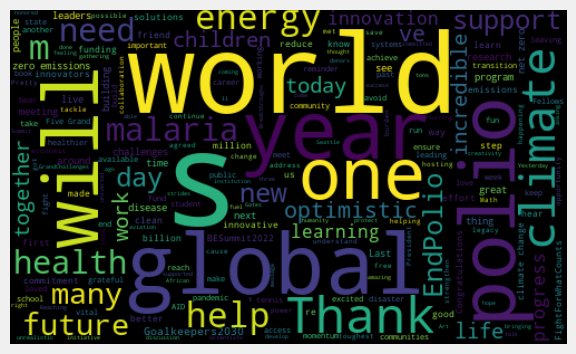

In [28]:
#Plot The Word Cloud
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [29]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

#Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,The climate crisis is already devastating comm...,0.585714,0.014286,Positive
1,I have never met anyone who was more passionat...,0.783333,-0.183333,Negative
2,More than 1B people globally still suffer from...,0.500000,0.250000,Positive
3,This year's BESummit2022 brought together inve...,0.000000,0.000000,Neutral
4,"Math shouldn’t be a gatekeeper, limiting a stu...",0.000000,0.000000,Neutral
...,...,...,...,...
95,It’s easy to forget how scary polio was in the...,0.944444,0.077778,Positive
96,Damaris Matoke-Muhia is changing the fight aga...,0.400000,0.250000,Positive
97,I cannot agree with _HamidJafari more: women v...,0.541667,0.400000,Positive
98,"Last year, I laid out a plan for eliminating g...",0.322222,0.300000,Positive


In [30]:
#Print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Positive'):   
        print(str(j) + ') '+sortedDF['Tweets'][i])
        print()
        j = j+1

1) The climate crisis is already devastating communities. More funding is necessary to ensure agricultural and technological innovations are widely available to the most vulnerable, helping them adapt to climate change, save lives, and increase economic opportunity. 

2) More than 1B people globally still suffer from NTDs, many caused by parasites. I got a firsthand look at these creepy crawlies at the Parasitic Museum in Tokyo. The more we understand them, the better we can address the diseases they cause. 

3) I had a great meeting with  to discuss the importance of funding research to address some of the future challenges we face in global health. 

4) I am thrilled to see the existing partnership between  and  strengthen with the signing of this MOU today. Global collaboration like this has the power to bring the clean energy solutions we need to communities around the world. 

5) Testing for viruses with a breathalyzer? It’s possible. Pretty incredible to see the innovative work h

In [42]:
#Print the negative tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending = False)
for i in range(0, sortedDF.shape[0]):
    if( sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+ sortedDF['Tweets'][i])
        print()
        j = j+1

1) I have never met anyone who was more passionate about reducing the world’s worst inequities in health than Paul Farmer. I continue to learn from my dear friend’s life and legacy today. 

2)   It’s unrealistic to expect people to stop traveling by plane. We must scale innovations that decarbonize the aviation industry.  will help us achieve this by building the world’s first plant for turning alcohol into sustainable aviation fuel. 

3) Last week, I sat down with Bloomberg  to talk about why I remain so committed to eradicating polio. By coming together and funding efforts like the Global Polio Eradication Initiative, we can EndPolio and build a healthier world. 

4) The world can end this pandemic while also preventing the next. As  shares, "such changes seem unrealistic given the relentless disappointments of the past three years, but substantial social progress always seems unfeasible until it is actually achieved." 

5) : Amidst backsliding on the SDGs in the past two years, this

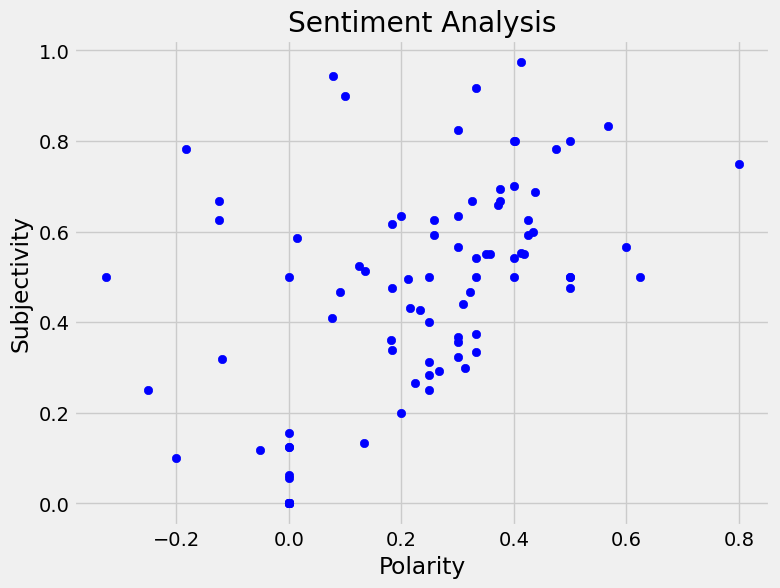

In [43]:
#Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [45]:
#Get the percentage of possitive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) *100, 1)

67.0

In [48]:
#Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round( (ntweets.shape[0] / df.shape[0] *100), 1)

8.0

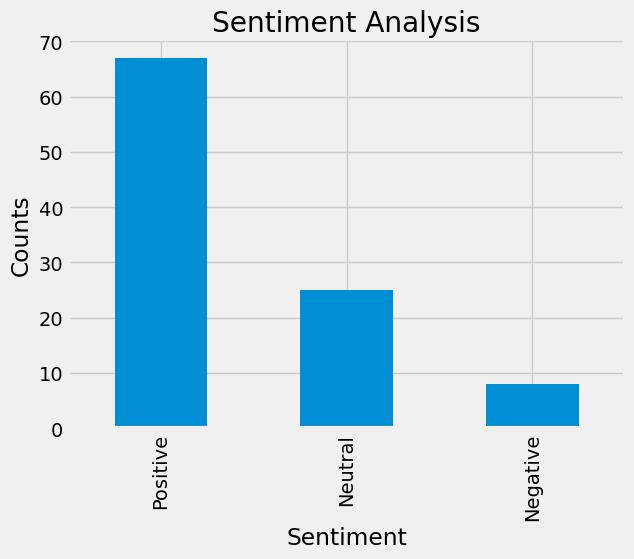

In [54]:
#Show the value counts
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()